## Датасет: Credit Card Fraud - Мошенничество с кредитными картами

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv ('card_transdata.csv')
print (data.shape)
data.head ()

(1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


1. distance_from_home - расстояние от дома, где произошла транзакция
2. distance_from_last_transaction - расстояние от последней транзакции
3. ratio_to_median_purchase_price - отношение цены покупки к медианной цене покупки
4. repeat_retailer - транзакция произошла от одного и того же продавца
5. used_chip - транзакция через чип (кредитную карту)
6. used_pin_number - произошла ли транзакция с использованием PIN-кода
7. online_order - является ли транзакция онлайн-заказом
8. fraud - является ли транзакция мошеннической

Каждый из признаков выглядит подходящим по смыслу для дальнейшей работы, т.е. нет признаков, однозначно не влияющих на результат (вроде имён и идентификационных номеров). Значит, не выкидываем признаки.

In [3]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Все признаки представлены числами. Нет категориальных, преобразования не требуются.

In [4]:
data.columns.isna ().any ()

False

Пропусков в данных нет. Дозаполнение не требуется. Выкидывание признаков без достаточной информации для дозаполнения не требуется.

#### Корреляция:

In [5]:
data.corr ()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<AxesSubplot: >

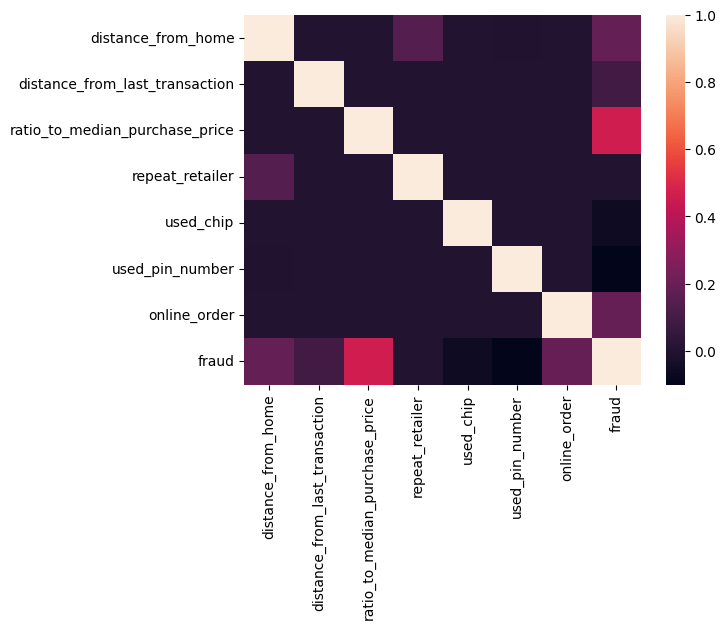

In [6]:
sns.heatmap (data.corr ())

Как можно заметить, больше всего влияют отношение цены покупки к медианной цене покупки, расстояние от дома, где произошла транзакция и то, является ли транзакция онлайн-заказом.
Меньше всего - то, происходила ли транзакция от одного и того же продавца.

In [7]:
data.describe ()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
labels = data ['fraud']
data.drop (['fraud'], axis = 1)
pass

#### Распределение признаков

<AxesSubplot: xlabel='distance_from_home', ylabel='Count'>

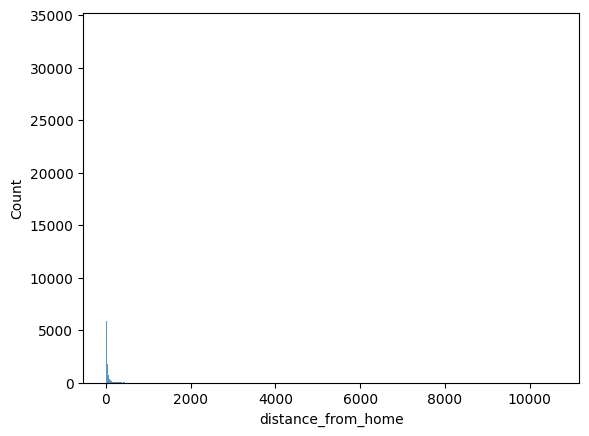

In [9]:
sns.histplot (data ['distance_from_home'])

In [10]:
data ['distance_from_home'] [data ['distance_from_home'] > 1000].count ()

486

Строк, в которых значение расстояния от дома больше 1000, очень мало по сравнению со всем объёмом данных. Эти строки можно удалить.

<AxesSubplot: xlabel='distance_from_home', ylabel='Count'>

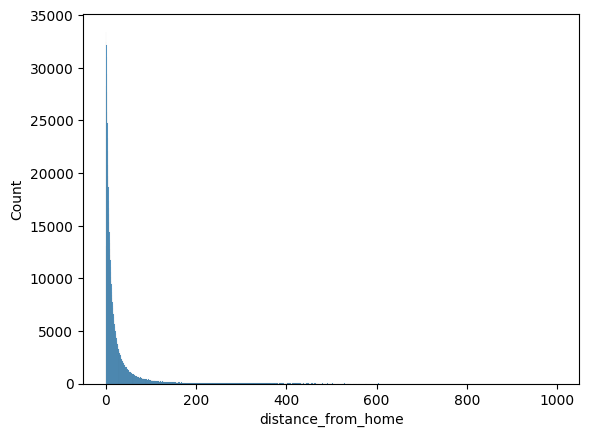

In [11]:
data = data [data.distance_from_home <= 1000]
sns.histplot (data ['distance_from_home'])

<AxesSubplot: xlabel='distance_from_last_transaction', ylabel='Count'>

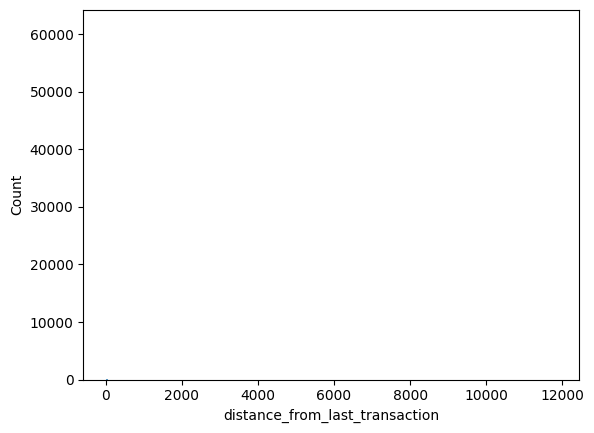

In [12]:
sns.histplot (data ['distance_from_last_transaction'])

Строк, в которых значение расстояния от места последней транзакции больше 1000, очень мало по сравнению со всем объёмом данных. Эти строки можно удалить.

In [13]:
data ['distance_from_last_transaction'] [data ['distance_from_last_transaction'] > 1000].count ()

56

<AxesSubplot: xlabel='distance_from_last_transaction', ylabel='Count'>

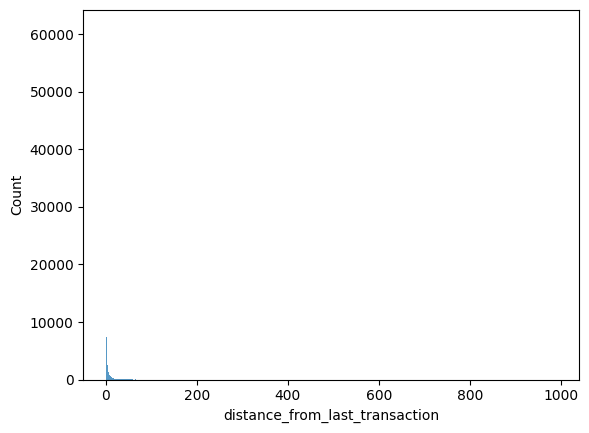

In [14]:
data = data [data.distance_from_last_transaction <= 1000]
sns.histplot (data ['distance_from_last_transaction'])

<AxesSubplot: xlabel='ratio_to_median_purchase_price', ylabel='Count'>

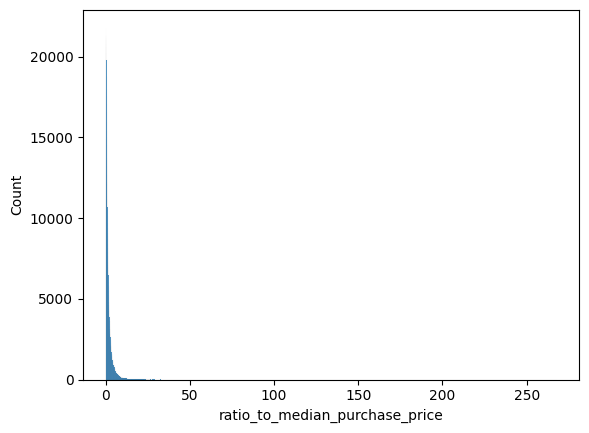

In [15]:
sns.histplot (data ['ratio_to_median_purchase_price'])

In [16]:
data ['ratio_to_median_purchase_price'] [data ['ratio_to_median_purchase_price'] > 50].count ()

190

Аналогично с отношением цены покупки к медианной цене покупки.

<AxesSubplot: xlabel='ratio_to_median_purchase_price', ylabel='Count'>

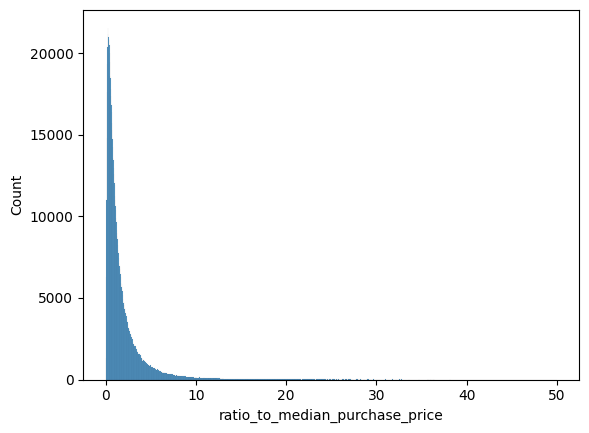

In [18]:
data = data [data.ratio_to_median_purchase_price <= 50]
sns.histplot (data ['ratio_to_median_purchase_price'])